In [100]:
import json
import os
import numpy as np
import pandas as pd
import pygmo as pg
from pygmo import hypervolume
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [101]:

list_folder_paths = ['../EvolutionaryFramework/results/NSGA_II/ExpNSGA', '../EvolutionaryFramework/results/MOEA_D/ExpMOEA_D']

In [102]:
def generateJSONsNSGA(folderPath):
    target_folders = [folder for folder in os.listdir(folderPath) if folder.startswith('2023_08')]

    for folder in target_folders:

        folder_averages2 = {}

        folder_path = os.path.join(folderPath, folder)
        files = os.listdir(folder_path)

        criteria = []
        result = {f"generation_{gen}": 0.0 for gen in range(0,251)} 
        resultValues = {f"generation_{gen}": [] for gen in range(0,251)} 
        count = 0 
        
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(folder_path, file)
                with open(file_path) as f:
                    parsed_json = json.load(f)

                if not criteria:
                    criteria = parsed_json["metaParameters"]['criteria']

                data = {}
                count += 1

                for elem in parsed_json:
                    if elem == "experiment":
                        for gen in parsed_json[elem]:
                            if gen != "qualityOfPopulation":
                                gen_data = []
                                for individual in parsed_json[elem][gen]["front_1"]:
                                    dictionary = {}
                                    for criterion in criteria:
                                        fitness_value = individual['fitness'][criterion]
                                        if fitness_value is not None:
                                            dictionary[criterion] = -fitness_value
                                        else:
                                            dictionary[criterion] = None
                                    gen_data.append(dictionary)

                                data[gen] = gen_data

                # Calculate hypervolume for each generation
                hyper_values = []
                for genKey, genValue in data.items():
                    data_df = pd.DataFrame(genValue)
                    data_df = data_df.dropna()
                    hyper = pg.hypervolume(data_df.to_numpy())
                    hyperValue = hyper.compute([0.0, 0.0])
                    resultValues[genKey].append(hyperValue)

        output_file = 'JSON/NSGA/' + f'hyperVolumeNSGA{folder}ALL.json'
        with open(output_file, 'w') as f:
            json.dump(resultValues, f, indent=4)

        print('Folder averages saved successfully.')

generateJSONsNSGA(list_folder_paths[0])

Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.


In [103]:
def generateJSONsMOEAD(folderPath):  
    target_folders = [folder for folder in os.listdir(folderPath) if folder.startswith('2023_08')]  
    for folder in target_folders:

        folder_averages2 = {}

        folder_path = os.path.join(folderPath, folder)
        files = os.listdir(folder_path)

        criteria = []
        result = {f"generation_{gen}": 0.0 for gen in range(0,251)} 
        resultValues = {f"generation_{gen}": [] for gen in range(0,251)} 
        count = 0 
        
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(folder_path, file)
                with open(file_path) as f:
                    parsed_json = json.load(f)

                if not criteria:
                    criteria = parsed_json["metaParameters"]['criteria']

                data = {}
                count += 1

                for elem in parsed_json:
                    if elem == "experiment":
                        for gen in parsed_json[elem]:
                            if gen != "qualityOfPopulation":
                                gen_data = []
                                for individual in parsed_json[elem][gen]:
                                    dictionary = {}
                                    for criterion in criteria:
                                        fitness_value = individual['fitness'][criterion]
                                        if fitness_value is not None:
                                            dictionary[criterion] = -fitness_value
                                        else:
                                            dictionary[criterion] = None
                                    gen_data.append(dictionary)

                                data[gen] = gen_data

                # Calculate hypervolume for each generation
                hyper_values = []
                gen0 = True
                resultValues['generation_0'].append(0.35)
                
                for genKey, genValue in data.items():
                    data_df = pd.DataFrame(genValue)
                    data_df = data_df.dropna()
                    hyper = pg.hypervolume(data_df.to_numpy())
                    hyperValue = hyper.compute([0.0, 0.0])

                    resultValues[genKey].append(hyperValue)

        output_file = 'JSON/MOEA_D/' + f'hyperVolumeMOEA_D{folder}ALL.json'
        with open(output_file, 'w') as f:
            json.dump(resultValues, f, indent=4)

        print('Folder averages saved successfully.')

generateJSONsMOEAD(list_folder_paths[1])

Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.


In [132]:
def generateData(folder_path, n1, n2):
    hypervolume_data = {}
    # folder_path = "JSON/NSGA"
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(folder_path, file)
            with open(file_path) as f:
                parsed_json = json.load(f)
            data = {}
            for gen in parsed_json:
                data[gen[11:]] = parsed_json[gen]
            hypervolume_data[file_path[n1:n2]] = data
    df = pd.DataFrame(hypervolume_data)

    df = df[sorted(df.columns)]

    concatenated_data = []  # List to hold concatenated data for each row
    for index, row in df.iterrows():
        row_values = [value for cell_values in row for value in cell_values]
        concatenated_data.append(row_values)

    df['concatenated_data'] = concatenated_data
    
    print(df)


    summary_data = {}

    for experiment_name, experiment_values in df.items():
        
        means = []
        std_devs = []
        for generation_values in experiment_values:
            generation_mean = np.mean(generation_values)
            generation_std = np.std(generation_values)
            means.append(generation_mean)
            std_devs.append(generation_std)
        summary_data[experiment_name] = {'mean': means, 'std_dev': std_devs}

    # Create a DataFrame from the summary data dictionary
    summary_df = pd.DataFrame(summary_data)

    # Print the DataFrame with means and standard deviations
    summary_df


    return summary_df

In [133]:
nsga_df = generateData("JSON/NSGA", 25, 44)
moead_df = generateData("JSON/MOEA_D", 29, 48)

                                   2023_08_22_07:29:03  \
0    [0.23766853477956182, 0.3105707872174371, 0.39...   
1    [0.5126408749045791, 0.4382616906014946, 0.459...   
2    [0.5173291296994268, 0.4473901488613595, 0.464...   
3    [0.5274312957423678, 0.5031569680004461, 0.511...   
4    [0.5295208761163519, 0.526774788492205, 0.5131...   
..                                                 ...   
246  [0.6778249455689688, 0.6778242871124658, 0.675...   
247  [0.6778258634831504, 0.6778833770442876, 0.675...   
248  [0.6778296707415485, 0.6778881844486387, 0.675...   
249  [0.6783266957518632, 0.6778881844486387, 0.675...   
250  [0.6783294512312048, 0.6778881844486387, 0.675...   

                                   2023_08_22_07:32:30  \
0    [0.3320425658455274, 0.3588274253774857, 0.394...   
1    [0.45241706670367665, 0.45242057812282055, 0.4...   
2    [0.4566728717841803, 0.4655050302320483, 0.474...   
3    [0.49090451061404194, 0.46785780920931774, 0.4...   
4    [0.50864

In [134]:
nsga_df

,2023_08_22_07:29:03,2023_08_22_07:32:30,2023_08_22_07:36:05,2023_08_22_07:40:00,2023_08_22_07:45:23,2023_08_22_07:49:24,2023_08_22_07:53:03,2023_08_22_07:56:52,concatenated_data
mean,"[0.3515668540639092, 0.45479162427533737, 0.46...","[0.3524082223680777, 0.44622023887944345, 0.46...","[0.3557706645002285, 0.45807841066947647, 0.46...","[0.36070599965182926, 0.4501469211232985, 0.46...","[0.39446628218601365, 0.46894166490468897, 0.4...","[0.371902739402025, 0.4619427788871066, 0.4731...","[0.36660660781816523, 0.4520416247236641, 0.46...","[0.37400561998702064, 0.4547759943051644, 0.46...","[0.36592912374715864, 0.45586740722102254, 0.4..."
std_dev,"[0.04659091616486713, 0.02189568776054515, 0.0...","[0.0364191901858079, 0.012260559405714303, 0.0...","[0.030920539743100894, 0.015357829734574271, 0...","[0.03294641958748704, 0.012301108662982032, 0....","[0.026885932240508555, 0.013743576019962483, 0...","[0.021875361873684135, 0.008432671376265076, 0...","[0.026429530226055487, 0.013607739226948554, 0...","[0.018757330388927608, 0.015782255174259158, 0...","[0.033958921326776734, 0.01607280487999807, 0...."


In [135]:
moead_df

,2023_08_22_08:01:47,2023_08_22_08:02:16,2023_08_22_08:02:39,2023_08_22_08:03:01,2023_08_22_08:03:23,2023_08_22_08:03:44,2023_08_22_08:04:05,2023_08_22_08:04:25,concatenated_data
mean,"[0.35, 0.45239173976091146, 0.4731084070721218...","[0.35, 0.444068361462757, 0.4708784950866935, ...","[0.35, 0.43840905080131787, 0.4683270014767936...","[0.35, 0.43107340370132824, 0.4639406261291983...","[0.35, 0.45410559177050647, 0.4767465874591899...","[0.35, 0.4567913898731386, 0.4852677853348915,...","[0.35, 0.45005883169928984, 0.4814250616518099...","[0.35, 0.4568249293514953, 0.4748747768645491,...","[0.35000000000000003, 0.44796541230259307, 0.4..."
std_dev,"[0.0, 0.015630686512596508, 0.0167085076212554...","[0.0, 0.017843274087205152, 0.0140665545242372...","[0.0, 0.013709752872351204, 0.0114442465812655...","[0.0, 0.017104713297095335, 0.0107685635583315...","[0.0, 0.015147941650729174, 0.0123846750332733...","[0.0, 0.016493550171918163, 0.0086792851479134...","[0.0, 0.0210292456058948, 0.01440007128161589,...","[0.0, 0.014519530101255323, 0.0153458842575114...","[5.551115123125783e-17, 0.018733956807338362, ..."


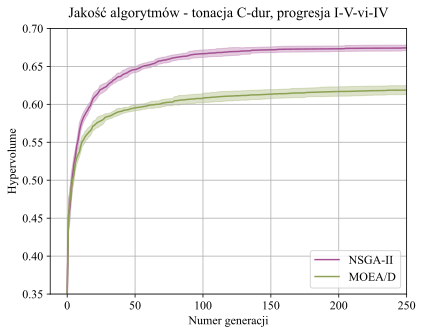

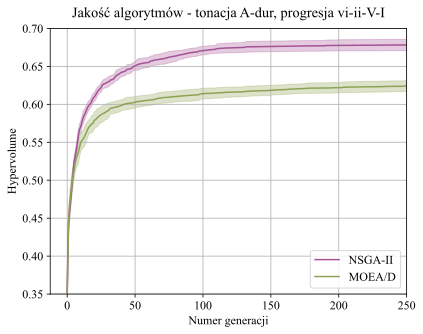

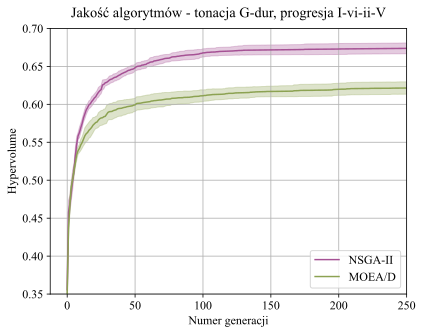

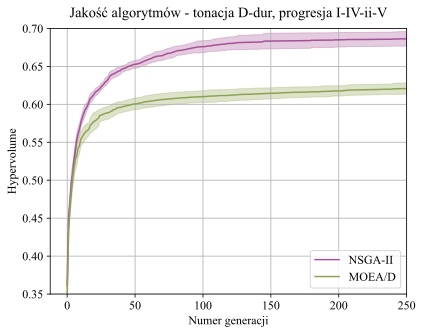

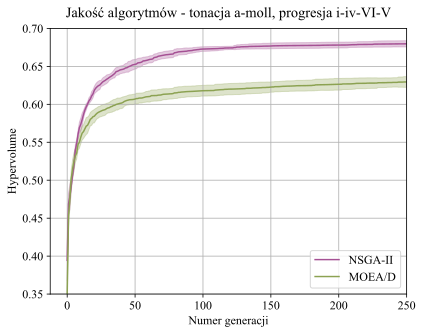

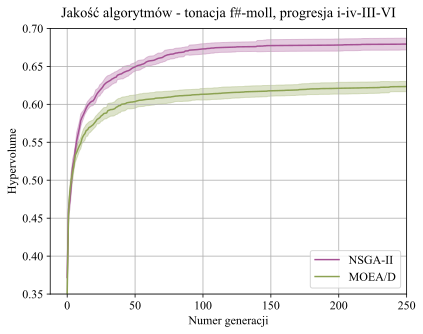

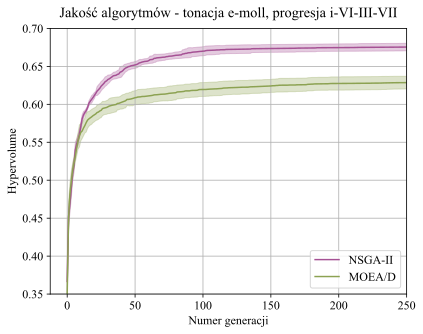

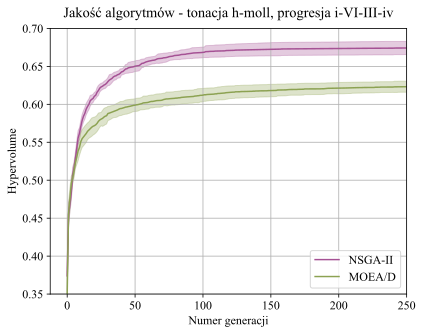

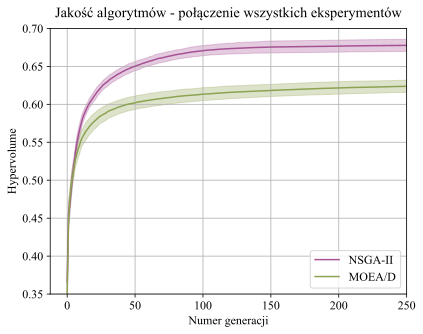

In [140]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 12})

X = np.arange(0,251)

tab20b_cmap = plt.get_cmap('tab20b')


scales = ["C-dur", "A-dur", "G-dur", "D-dur", "a-moll", "f#-moll", "e-moll", "h-moll"]
progressions = ["I-V-vi-IV", "vi-ii-V-I", "I-vi-ii-V", "I-IV-ii-V", "i-iv-VI-V", "i-iv-III-VI", "i-VI-III-VII", "i-VI-III-iv"]
enumeratee = [0,1,2,3,4,5,6,7,8]

Y_meanNSGA = []
Y_std_devNSGA = []
for experiment_name in nsga_df.columns:
    Y_meanNSGA.append(np.array(nsga_df[experiment_name]['mean']))
    Y_std_devNSGA.append(np.array(nsga_df[experiment_name]['std_dev']))

Y_meanMOEAD = []
Y_std_devMOEAD = []
for experiment_name in moead_df.columns:
    Y_meanMOEAD.append(np.array(moead_df[experiment_name]['mean']))
    Y_std_devMOEAD.append(np.array(moead_df[experiment_name]['std_dev']))


# Print the lists Y_mean and Y_std_dev for each experiment
for i, mean_valuesN, std_dev_valuesN, mean_valuesM, std_dev_valuesM in zip(enumeratee, Y_meanNSGA, Y_std_devNSGA, Y_meanMOEAD, Y_std_devMOEAD):

    if i==8 :
        plt.title(f"Jakość algorytmów - połączenie wszystkich eksperymentów", y=1.02)
    else:
        plt.title(f"Jakość algorytmów - tonacja {scales[i]}, progresja {progressions[i]}", y=1.02)

    plt.plot(X, mean_valuesN, label=f"NSGA-II", color=tab20b_cmap(17))
    plt.fill_between(X, mean_valuesN - std_dev_valuesN, mean_valuesN + std_dev_valuesN, alpha=0.3, color=tab20b_cmap(17))
    plt.plot(X, mean_valuesM, label=f"MOEA/D", color=tab20b_cmap(5))
    plt.fill_between(X, mean_valuesM - std_dev_valuesM, mean_valuesM + std_dev_valuesM, alpha=0.3, color=tab20b_cmap(5))

    plt.xlabel('Numer generacji')
    plt.ylabel('Hypervolume')

    plt.xlim(right=250)
    plt.ylim(bottom=0.35, top=0.7)
    plt.grid()
    plt.legend(loc='lower right')
    

    if i == 8:
        filename = "All_Experiments"
    else:
        filename = f"Experiment_{scales[i]}_{progressions[i]}"
    
    plt.savefig(f"{filename}.svg", format="svg")

    plt.show()
    
    plt.close()  # Close the plot to release resources




In [137]:
import scipy.stats as stats

value_NSGA, std_dev_NSGA, sample_size_NSGA = Y_meanNSGA[0][-1], Y_std_devNSGA[0][-1], 80
value_MOEAD, std_dev_MOEAD, sample_size_MOEAD = Y_meanMOEAD[0][-1], Y_std_devMOEAD[0][-1], 80

print(f'średnia dla NSGA: {value_NSGA}')
print(f'odchylenie dla NSGA: {std_dev_NSGA}')
print(f'średnia dla MOEAD: {value_MOEAD}')
print(f'odchylenie dla MOEAD: {std_dev_MOEAD}')


t_statistic, p_value= stats.ttest_ind_from_stats(mean1=value_NSGA, std1=std_dev_NSGA, nobs1=sample_size_NSGA,
                                                  mean2=value_MOEAD, std2=std_dev_MOEAD, nobs2=sample_size_MOEAD)

# Determine significance level (e.g., 0.05)
alpha = 0.05

print(t_statistic, p_value)

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Odrzucamy hipotezę zerową: Jakość algorytmu NSGA-II jest tak samo dobra jak MOEA/D i Przyjmujemy hipotezę alternatywną: Jakość algorytmu NSGA-II jest różna od MOEA/D")
else:
    print("Przyjmujemy hipotezę zerową")


średnia dla NSGA: 0.6744078873194267
odchylenie dla NSGA: 0.003804911597713665
średnia dla MOEAD: 0.6187804573223457
odchylenie dla MOEAD: 0.005976777683525066
70.22398789348959 4.741088588360764e-121
Odrzucamy hipotezę zerową: Jakość algorytmu NSGA-II jest tak samo dobra jak MOEA/D i Przyjmujemy hipotezę alternatywną: Jakość algorytmu NSGA-II jest różna od MOEA/D
